In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import geopandas
import numpy as np
import time

In [2]:
df = geopandas.read_file('../datasets/Neighborhood Tabulation Areas.geojson')
df = df.drop(columns=['county_fips', 'shape_leng', 'shape_area'])

In [3]:
df.boro_code = df.boro_code.astype('int')
df = df[(df.boro_code==1)| (df.boro_code==3)]
df.head()

ntacode                  ntaname  boro_name  boro_code  \
0     BK88             Borough Park   Brooklyn          3   
4     MN06           Manhattanville  Manhattan          1   
7     BK25                Homecrest   Brooklyn          3   
10    MN19  Turtle Bay-East Midtown  Manhattan          1   
14    BK44                  Madison   Brooklyn          3   

                                             geometry  
0   (POLYGON ((-73.97604935657381 40.6312759056467...  
4   (POLYGON ((-73.94607828674226 40.8212632160619...  
7   (POLYGON ((-73.95859278495766 40.6104030309350...  
10  (POLYGON ((-73.96124698011518 40.7404235971153...  
14  (POLYGON ((-73.93753749374089 40.6085573897549...

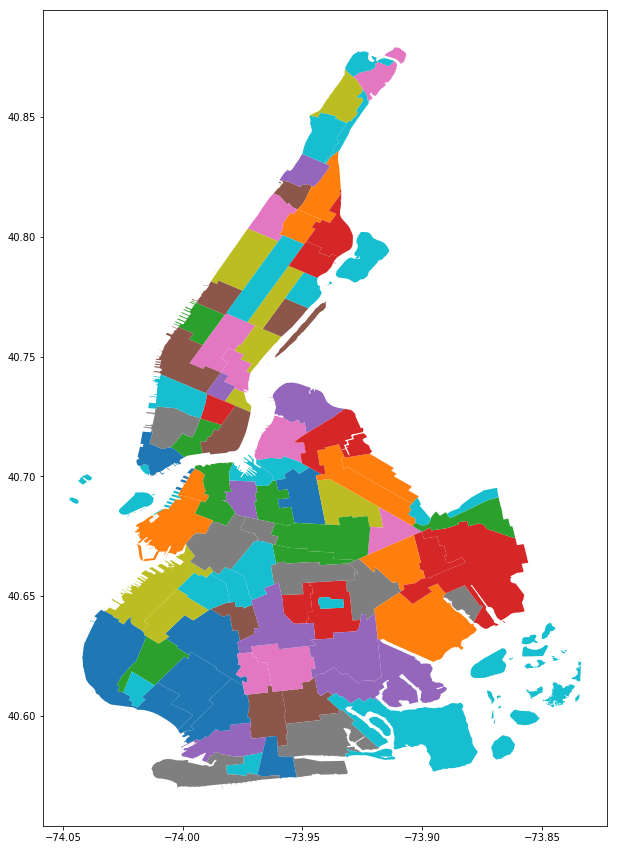

In [4]:
df.plot(figsize=(25,15),column='ntaname');

In [5]:
df.ntacode.unique()

array(['BK88', 'MN06', 'BK25', 'MN19', 'BK44', 'BK41', 'BK95', 'BK69',
       'BK17', 'BK43', 'BK26', 'BK29', 'BK72', 'BK75', 'BK35', 'BK79',
       'BK61', 'BK63', 'BK96', 'BK93', 'BK91', 'BK78', 'BK77', 'BK46',
       'BK68', 'MN31', 'BK30', 'BK23', 'BK09', 'MN15', 'BK85', 'BK27',
       'BK28', 'BK76', 'BK73', 'BK81', 'MN27', 'MN35', 'MN25', 'MN14',
       'MN17', 'MN40', 'BK34', 'BK60', 'MN11', 'BK19', 'BK21', 'MN50',
       'BK38', 'BK40', 'BK64', 'BK45', 'BK50', 'BK42', 'BK58', 'BK32',
       'BK33', 'BK37', 'BK90', 'MN20', 'MN09', 'MN03', 'BK82', 'BK83',
       'MN32', 'MN04', 'MN36', 'BK31', 'MN28', 'MN21', 'MN01', 'MN22',
       'MN24', 'MN13', 'MN23', 'MN12', 'MN99', 'MN33', 'MN34', 'BK99'],
      dtype=object)

In [6]:
df.head()

ntacode                  ntaname  boro_name  boro_code  \
0     BK88             Borough Park   Brooklyn          3   
4     MN06           Manhattanville  Manhattan          1   
7     BK25                Homecrest   Brooklyn          3   
10    MN19  Turtle Bay-East Midtown  Manhattan          1   
14    BK44                  Madison   Brooklyn          3   

                                             geometry  
0   (POLYGON ((-73.97604935657381 40.6312759056467...  
4   (POLYGON ((-73.94607828674226 40.8212632160619...  
7   (POLYGON ((-73.95859278495766 40.6104030309350...  
10  (POLYGON ((-73.96124698011518 40.7404235971153...  
14  (POLYGON ((-73.93753749374089 40.6085573897549...

In [7]:
from shapely.geometry import Point

In [8]:
point = Point(-74.004256,40.600003)
point2 = geopandas.GeoSeries(point)

In [9]:
df[df.contains(point)]

ntacode     ntaname boro_name  boro_code  \
77    BK27  Bath Beach  Brooklyn          3   

                                             geometry  
77  (POLYGON ((-74.00200394677509 40.5941323717782...

# read apt dataframe and convert to geodf

In [10]:
#read df and convert to geodf
merged_df = pd.read_csv('data/merged_df.csv',index_col=0)

geometry = [Point(xy) for xy in zip(merged_df.lng, merged_df.lat)]
df2 = merged_df.drop(['lng','lat'], axis=1)
crs = {'init': 'epsg:4326'}
gdf = geopandas.GeoDataFrame(df2, crs=crs, geometry=geometry)

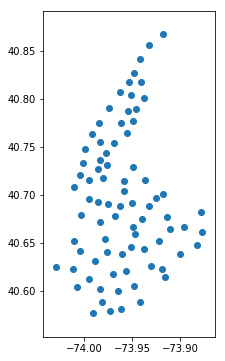

In [11]:
df.centroid.plot(figsize=(10,6));

In [142]:
df.centroid

0       POINT (-73.98866123067658 40.6309496554111)
4      POINT (-73.95378199217571 40.81797556613095)
7      POINT (-73.96433366847255 40.59995428584714)
10      POINT (-73.96901715430819 40.7543104853366)
14     POINT (-73.94813559465308 40.60491359558084)
15     POINT (-73.97619902578059 40.64059014567655)
16     POINT (-73.95162338294371 40.64611641995396)
18     POINT (-73.96236332340885 40.68796681281631)
19      POINT (-73.9415112942293 40.58829974112781)
25     POINT (-73.95682458081862 40.62092403922277)
26     POINT (-73.98143050403178 40.58840281809101)
27     POINT (-73.98353751289284 40.60142922014573)
28      POINT (-73.95859674784828 40.7039165260498)
29       POINT (-73.9499050210527 40.6915074977569)
30     POINT (-73.93188820650361 40.68816824308519)
31     POINT (-73.91364751024031 40.67663761692339)
32      POINT (-73.93928717423755 40.6744693701672)
33     POINT (-73.94878399053268 40.66653879755957)
34     POINT (-73.92225097372662 40.65236480424137)
36     POINT

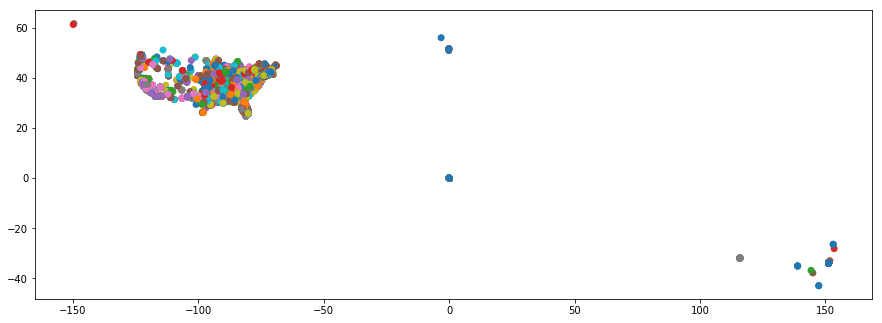

In [12]:
gdf.plot(column=gdf.address,figsize=(15,10));

In [71]:
test = df.geometry[173].centroid

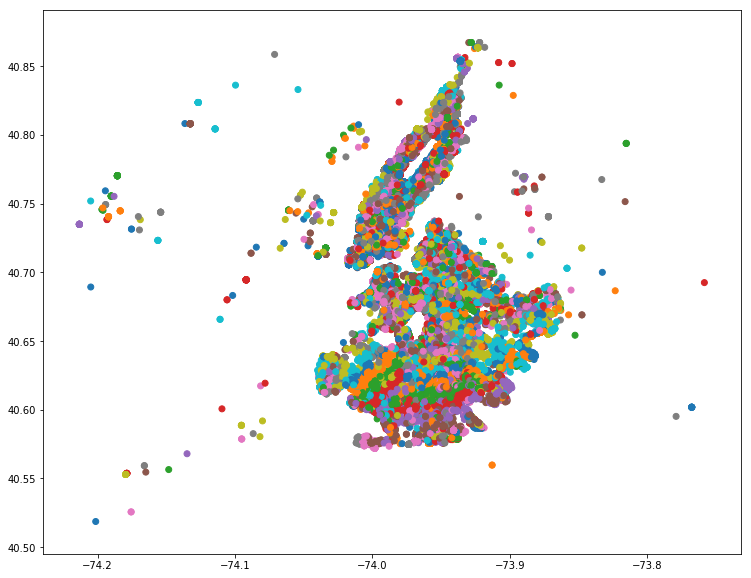

In [14]:
gdf[gdf.distance(test)<.25].plot(column=gdf[gdf.distance(test)<.25].address,figsize=(15,10));

### Load subway/citibike data

In [15]:
subway_df = pd.read_csv('data/subway_data.csv',index_col=0)
citi_13 = pd.read_csv('data/citi_13_data.csv',index_col=0)
citi_18 =pd.read_csv('data/citi_18_data.csv',index_col=0)

In [16]:
geometry = [Point(xy) for xy in zip(subway_df.long, subway_df.lat)]
crs = {'init': 'epsg:4326'}
subway_gdf = geopandas.GeoDataFrame(subway_df, crs=crs,geometry=geometry)
subway_gdf = subway_gdf.drop(columns=['the_geom','URL','NOTES','OBJECTID'])

In [17]:
subway_gdf = subway_gdf[subway_gdf.lat>1]
subway_gdf.reindex()

NAME             LINE        lat       long  \
0                       Astor Pl    4-6-6 Express  40.730054 -73.991070   
1                       Canal St    4-6-6 Express  40.718803 -74.000193   
2                        50th St              1-2  40.761728 -73.983849   
3                      Bergen St            2-3-4  40.680862 -73.974999   
4               Pennsylvania Ave              3-4  40.664714 -73.894886   
5                       238th St                1  40.884667 -73.900870   
6      Cathedral Pkwy (110th St)            A-B-C  40.800582 -73.958067   
7         Kingston - Throop Aves              A-C  40.679919 -73.940859   
8                        65th St            E-M-R  40.749719 -73.898788   
9                        36th St            E-M-R  40.751960 -73.929018   
10        Delancey St - Essex St            J-M-Z  40.718306 -73.987409   
11                Van Siclen Ave              J-Z  40.678028 -73.891658   
12                   Norwood Ave              J-Z  40.681520 -73.879626   
13               104th-102nd Sts              J-Z  40.695166 -73.844435   
14                    DeKalb Ave        B-D-N-Q-R  40.690648 -73.981771   
15                Beach 105th St              A-S  40.583268 -73.827581   
16                 Beach 90th St              A-S  40.588091 -73.813651   
17                    Freeman St              2-5  40.829987 -73.891752   
18                 Intervale Ave              2-5  40.822142 -73.896617   
19               182nd-183rd Sts              B-D  40.856093 -73.900741   
20               174th-175th Sts              B-D  40.845900 -73.910136   
21                      167th St              B-D  40.833769 -73.918432   
22          Mets - Willets Point      7-7 Express  40.754622 -73.845625   
23                 Junction Blvd      7-7 Express  40.749145 -73.869527   
24            Flushing - Main St      7-7 Express  40.759600 -73.830030   
25                     Buhre Ave      6-6 Express  40.846810 -73.832569   
26            3rd Ave - 138th St      6-6 Express  40.810476 -73.926138   
27               Castle Hill Ave      6-6 Express  40.834255 -73.851222   
28   Brooklyn Bridge - City Hall  4-5-6-6 Express  40.713065 -74.004131   
29                    Zerega Ave      6-6 Express  40.836488 -73.847036   
..                           ...              ...        ...        ...   
443                      14th St            A-C-E  40.740893 -74.001690   
444                 Nostrand Ave              3-4  40.669938 -73.950426   
445                     Clark St              2-3  40.697466 -73.993086   
446                 Franklin Ave              A-C  40.681380 -73.956848   
447    Clinton - Washington Aves              A-C  40.683263 -73.965838   
448                   Forest Ave                M  40.704412 -73.903075   
449                     110th St    4-6-6 Express  40.795020 -73.944250   
450                      86th St  4-5-6-6 Express  40.779492 -73.955589   
451                      York St                F  40.699743 -73.986885   
452                      High St              A-C  40.699337 -73.990531   
453                Lafayette Ave              A-C  40.686113 -73.973946   
454                 President St              2-5  40.667884 -73.950589   
455                     Woodlawn                4  40.886037 -73.878751   
456                  Bleecker St    4-6-6 Express  40.725915 -73.994659   
457                     103rd St    4-6-6 Express  40.790600 -73.947478   
458                   Euclid Ave            A-C-S  40.675377 -73.872106   
459                      88th St              A-S  40.679843 -73.851470   
460                 Cortelyou Rd                Q  40.640940 -73.963790   
461                     116th St    4-6-6 Express  40.798629 -73.941617   
462                  Parkchester      6-6 Express  40.833226 -73.860816   
463                  Franklin St              1-2  40.719318 -74.006886   
464                      80th St              A-S  40

# FIND CLOSEST SUBWAYS FOR ONE APT

In [18]:
### ADDRESS: 90 LEXINGTON AVENUE, 10016
### NEIGHBORHOOD: GRAMERCY
### POINT = (-73.95371589999998 40.782063)

x = gdf.geometry[846]

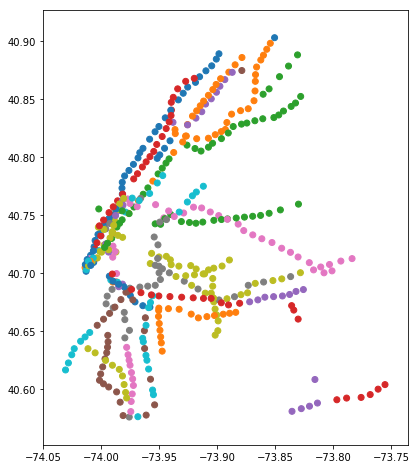

In [19]:
subway_gdf.plot(column=subway_gdf.LINE,figsize=(10,8));

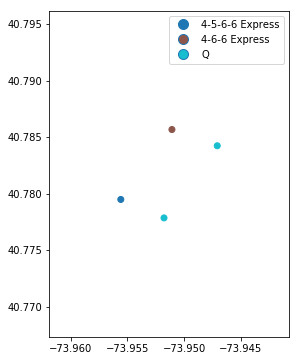

In [20]:
subway_gdf[subway_gdf.geometry.distance(x)<.008].plot(column=subway_gdf[subway_gdf.geometry.distance(x)<.008].LINE,figsize=(10,6),legend=True);

In [21]:
subway_gdf[subway_gdf.geometry.distance(x)<.008]

NAME             LINE        lat       long  \
32   96th St    4-6-6 Express  40.785672 -73.951070   
450  86th St  4-5-6-6 Express  40.779492 -73.955589   
471  86th St                Q  40.777861 -73.951771   
472  96th St                Q  40.784237 -73.947066   

                                   geometry  
32             POINT (-73.95107 40.7856719)  
450   POINT (-73.95558890000001 40.7794919)  
471           POINT (-73.9517709 40.777861)  
472  POINT (-73.94706600000001 40.78423665)

In [22]:
def get_subways_for_apt(address,distance):
    apt_index = gdf.index[gdf.address==address][0]
    nearest_subways = subway_gdf[subway_gdf.geometry.distance(gdf.geometry[apt_index])<=distance]
    sub_dict = nearest_subways.to_dict()
    sub_dict['address'] = address
    return sub_dict

In [23]:
d = get_subways_for_apt('150 WEST 66 STREET',.01)
d = pd.DataFrame.from_dict(d)
d

NAME     LINE        lat       long  \
87       66th St - Lincoln Ctr      1-2  40.773440 -73.982209   
93   59th St - Columbus Circle      1-2  40.768247 -73.981929   
161                    72nd St    1-2-3  40.778453 -73.981970   
352  59th St - Columbus Circle  A-B-C-D  40.768250 -73.981649   

                                         geometry             address  
87                   POINT (-73.9822089 40.77344)  150 WEST 66 STREET  
93           POINT (-73.98192900000001 40.768247)  150 WEST 66 STREET  
161  POINT (-73.98196999999999 40.77845300000001)  150 WEST 66 STREET  
352        POINT (-73.98164870000001 40.76824953)  150 WEST 66 STREET

# Get nearest subways for each apartment

In [24]:
def get_nearest_subways(distance):
    start = time.time()
    nearest_subways_dict = {}
    check_dict = {} #stores apt in dict to check against to speed up runtime
    
    #instantiate empty lists
    apt_list = []
    within_dist = []
    station_list=[]
    line_list=[]
    geo_list=[]
    station_lng = []
    station_lat = []
    
    #loop through addresses
    for c, apt in enumerate(gdf.address):
        #if address already appeared, pass, else:
        if apt not in check_dict.keys():
            nearest_subways = subway_gdf[subway_gdf.geometry.distance(gdf.geometry[c])<=distance]
            num_subways = len(nearest_subways)
            
            #if no subways within distance
            if num_subways==0:
                apt_list.append(apt)
                within_dist.append(num_subways)
                station_list.append(0)
                line_list.append(0)
                geo_list.append(0)
                station_lng.append(0)
                station_lat.append(0)
                
            #otherwise add each station, line, and coordinates to list
            else:
                for i in range(num_subways):
                    apt_list.append(apt)
                    within_dist.append(num_subways)
                    station_list.append(list(nearest_subways.NAME)[i])
                    line_list.append(list(nearest_subways.LINE)[i])
                    geo_list.append(list(nearest_subways.geometry)[i])
                    station_lng.append(list(nearest_subways.long)[i])
                    station_lat.append(list(nearest_subways.lat)[i])
                    

        check_dict[apt]=c #add apt to check dict

    #Timer to keep track of program running
        if c%5000 == 0:
            curr_time = time.time()
            if c != 0:
                print('Running time: {} seconds, {} entries remaining'.format(np.round((curr_time-start),2),len(gdf)-c))
    print ('Total Seconds to Complete: ',np.round((time.time()-start),2))
    
    #create dataframe from lists
    result_df = pd.DataFrame.from_records(data=[apt_list,within_dist,station_list,line_list,geo_list,station_lng,station_lat])
    result_df = result_df.T
    result_df.columns = ['address','num_within_dist','station','line','geometry','stat_lng','stat_lat']
    
    return result_df


In [25]:
t = get_nearest_subways(.008)

Running time: 8.87 seconds, 68157 entries remaining
Running time: 18.8 seconds, 63157 entries remaining
Running time: 23.68 seconds, 58157 entries remaining
Running time: 27.06 seconds, 53157 entries remaining
Running time: 31.1 seconds, 48157 entries remaining
Running time: 32.52 seconds, 43157 entries remaining
Running time: 35.84 seconds, 38157 entries remaining
Running time: 37.51 seconds, 33157 entries remaining
Running time: 45.05 seconds, 28157 entries remaining
Running time: 60.24 seconds, 23157 entries remaining
Running time: 72.98 seconds, 18157 entries remaining
Running time: 93.28 seconds, 13157 entries remaining
Running time: 107.74 seconds, 8157 entries remaining
Running time: 126.21 seconds, 3157 entries remaining
Total Seconds to Complete:  136.55


In [26]:
t

address num_within_dist                         station  \
0          70 BAY 10 STREET               0                               0   
1      8650 BAY 16TH STREET               3                         79th St   
2      8650 BAY 16TH STREET               3                        20th Ave   
3      8650 BAY 16TH STREET               3                        18th Ave   
4        70 BAY 20TH STREET               2                        20th Ave   
5        70 BAY 20TH STREET               2                        18th Ave   
6       130 BAY 10TH STREET               0                               0   
7       110 BAY 17TH STREET               2                        20th Ave   
8       110 BAY 17TH STREET               2                        18th Ave   
9        90 BAY 25TH STREET               3                         Bay Pky   
10       90 BAY 25TH STREET               3                        20th Ave   
11       90 BAY 25TH STREET               3                        18th Ave   
12      210 BAY 26TH STREET               1                        20th Ave   
13         8930 15TH AVENUE               0                               0   
14      310 BAY 14TH STREET               0                               0   
15      270 BAY 14TH STREET               0                               0   
16      290 BAY 13TH STREET               0                               0   
17      240 BAY 13TH STREET               0                               0   
18      250 BAY 13TH STREET               0                               0   
19       1140 SHORE PARKWAY               0                               0   
20      250 BAY 23RD STREET               1                        20th Ave   
21         8720 17TH AVENUE               0                               0   
22     8720 BAY 16TH STREET               1                        18th Ave   
23       2100 BENSON AVENUE               3                         Bay Pky   
24       2100 BENSON AVENUE               3                        20th Ave   
25       2100 BENSON AVENUE               3                        18th Ave   
26         8780 14TH AVENUE               0                               0   
27      180 BAY 26TH STREET               3                         Bay Pky   
28      180 BAY 26TH STREET               3                        20th Ave   
29      180 BAY 26TH STREET               3                        18th Ave   
...                     ...             ...                             ...   
47097   500 W. 110TH STREET               5       Cathedral Pkwy (110th St)   
47098   500 W. 110TH STREET               5  116th St - Columbia University   
47099   500 WEST 110 STREET               5       Cathedral Pkwy (110th St)   
47100   500 WEST 110 STREET               5                        103rd St   
47101   500 WEST 110 STREET               5                        103rd St   
47102   500 WEST 110 STREET               5       Cathedral Pkwy (110th St)   
47103   500 WEST 110 STREET               5  116th St - Columbia University   
47104   520 WEST 110 STREET               4       Cathedral Pkwy (110th St)   
47105   520 WEST 110 STREET               4                        103rd St   
47106   520 WEST 110 STREET               4       Cathedral Pkwy (110th St)   
47107   520 WEST 110 STREET               4  116th St - Columbia University   
47108   270 RIVERSIDE DRIVE               2                         96th St   
47109   270 RIVERSIDE DRIVE               2                        103rd St   
47110     610 WEST 110TH ST               3                        103rd St   
47111     610 WEST 110TH ST               3       Cathedral Pkwy (110th St)   
47112     610 WEST 110TH ST               3  116th St - Columbia University   
47113        450 W 167TH ST               3                        168th St   
47114        450 W 167TH ST               3                        168th St   
47115        450 W 167TH ST               3         163rd St - Amsterd

## GET LAT AND LONG FOR APARTMENTS

In [27]:
add_geo = gdf[['address','geometry']]
add_geo.head()

address                              geometry
0      70 BAY 10 STREET          POINT (-74.010374 40.609752)
1  8650 BAY 16TH STREET  POINT (-74.00533840000001 40.607264)
2  8650 BAY 16TH STREET  POINT (-74.00533840000001 40.607264)
3  8650 BAY 16TH STREET  POINT (-74.00533840000001 40.607264)
4  8650 BAY 16TH STREET  POINT (-74.00533840000001 40.607264)

In [28]:
add_lng_lat = []

for i,g in enumerate(add_geo.geometry):
    g1 = str(g)
    g2 = g1.split('(')[1].split(')')[0].split(' ')
    g_lng = float(g2[0])
    g_lat = float(g2[1])
    add_lng_lat.append((add_geo.address[i],g_lng,g_lat))
    

In [29]:
add_lng_lat_df = pd.DataFrame.from_records(add_lng_lat,columns=['address','add_lng','add_lat'])

In [30]:
add_lng_lat_df = add_lng_lat_df.drop_duplicates()
add_lng_lat_df = add_lng_lat_df.reset_index(drop=True)
add_lng_lat_df.head()

address    add_lng    add_lat
0      70 BAY 10 STREET -74.010374  40.609752
1  8650 BAY 16TH STREET -74.005338  40.607264
2    70 BAY 20TH STREET -74.002813  40.605148
3   130 BAY 10TH STREET -74.011683  40.608472
4   110 BAY 17TH STREET -74.006032  40.605548

### MERGE LATLONG DF WITH SUBWAYS DF

In [31]:
dist_df = t.merge(add_lng_lat_df, on='address')
dist_df[['stat_lat','stat_lng']] = dist_df[['stat_lat','stat_lng']].astype('float')
dist_df.head()

address num_within_dist   station line  \
0      70 BAY 10 STREET               0         0    0   
1  8650 BAY 16TH STREET               3   79th St    D   
2  8650 BAY 16TH STREET               3  20th Ave    D   
3  8650 BAY 16TH STREET               3  18th Ave    D   
4    70 BAY 20TH STREET               2  20th Ave    D   

                                geometry   stat_lng   stat_lat    add_lng  \
0                                      0   0.000000   0.000000 -74.010374   
1  POINT (-74.0005828 40.61315889999999) -74.000583  40.613159 -74.005338   
2  POINT (-73.9981743 40.60467689999999) -73.998174  40.604677 -74.005338   
3         POINT (-74.0015925 40.6077357) -74.001593  40.607736 -74.005338   
4  POINT (-73.9981743 40.60467689999999) -73.998174  40.604677 -74.002813   

     add_lat  
0  40.609752  
1  40.607264  
2  40.607264  
3  40.607264  
4  40.605148

In [32]:
dist_df.dtypes

address             object
num_within_dist     object
station             object
line                object
geometry            object
stat_lng           float64
stat_lat           float64
add_lng            float64
add_lat            float64
dtype: object

In [33]:
dist_df

address num_within_dist                         station  \
0          70 BAY 10 STREET               0                               0   
1      8650 BAY 16TH STREET               3                         79th St   
2      8650 BAY 16TH STREET               3                        20th Ave   
3      8650 BAY 16TH STREET               3                        18th Ave   
4        70 BAY 20TH STREET               2                        20th Ave   
5        70 BAY 20TH STREET               2                        18th Ave   
6       130 BAY 10TH STREET               0                               0   
7       110 BAY 17TH STREET               2                        20th Ave   
8       110 BAY 17TH STREET               2                        18th Ave   
9        90 BAY 25TH STREET               3                         Bay Pky   
10       90 BAY 25TH STREET               3                        20th Ave   
11       90 BAY 25TH STREET               3                        18th Ave   
12      210 BAY 26TH STREET               1                        20th Ave   
13         8930 15TH AVENUE               0                               0   
14      310 BAY 14TH STREET               0                               0   
15      270 BAY 14TH STREET               0                               0   
16      290 BAY 13TH STREET               0                               0   
17      240 BAY 13TH STREET               0                               0   
18      250 BAY 13TH STREET               0                               0   
19       1140 SHORE PARKWAY               0                               0   
20      250 BAY 23RD STREET               1                        20th Ave   
21         8720 17TH AVENUE               0                               0   
22     8720 BAY 16TH STREET               1                        18th Ave   
23       2100 BENSON AVENUE               3                         Bay Pky   
24       2100 BENSON AVENUE               3                        20th Ave   
25       2100 BENSON AVENUE               3                        18th Ave   
26         8780 14TH AVENUE               0                               0   
27      180 BAY 26TH STREET               3                         Bay Pky   
28      180 BAY 26TH STREET               3                        20th Ave   
29      180 BAY 26TH STREET               3                        18th Ave   
...                     ...             ...                             ...   
47097   500 W. 110TH STREET               5       Cathedral Pkwy (110th St)   
47098   500 W. 110TH STREET               5  116th St - Columbia University   
47099   500 WEST 110 STREET               5       Cathedral Pkwy (110th St)   
47100   500 WEST 110 STREET               5                        103rd St   
47101   500 WEST 110 STREET               5                        103rd St   
47102   500 WEST 110 STREET               5       Cathedral Pkwy (110th St)   
47103   500 WEST 110 STREET               5  116th St - Columbia University   
47104   520 WEST 110 STREET               4       Cathedral Pkwy (110th St)   
47105   520 WEST 110 STREET               4                        103rd St   
47106   520 WEST 110 STREET               4       Cathedral Pkwy (110th St)   
47107   520 WEST 110 STREET               4  116th St - Columbia University   
47108   270 RIVERSIDE DRIVE               2                         96th St   
47109   270 RIVERSIDE DRIVE               2                        103rd St   
47110     610 WEST 110TH ST               3                        103rd St   
47111     610 WEST 110TH ST               3       Cathedral Pkwy (110th St)   
47112     610 WEST 110TH ST               3  116th St - Columbia University   
47113        450 W 167TH ST               3                        168th St   
47114        450 W 167TH ST               3                        168th St   
47115        450 W 167TH ST               3         163rd St - Amsterd

## Calculate distance between address and each station

In [34]:
from math import *

def haversine(row):
    lon1 = row['add_lng']
    lat1 = row['add_lat']
    lon2 = row['stat_lng']
    lat2 = row['stat_lat']
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * np.arcsin(sqrt(a)) 
    miles = 3959 * c
    return miles

In [35]:
%%timeit

dist_df['dist_miles'] = dist_df.apply(lambda row: haversine(row), axis=1)
dist_df


3.53 s ± 62.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [36]:
#remove addresses with no subways within walking distance
dist_df = dist_df[dist_df.station!=0]
dist_df = dist_df.reset_index(drop=True)

In [37]:
dist_df

address num_within_dist                         station  \
0      8650 BAY 16TH STREET               3                         79th St   
1      8650 BAY 16TH STREET               3                        20th Ave   
2      8650 BAY 16TH STREET               3                        18th Ave   
3        70 BAY 20TH STREET               2                        20th Ave   
4        70 BAY 20TH STREET               2                        18th Ave   
5       110 BAY 17TH STREET               2                        20th Ave   
6       110 BAY 17TH STREET               2                        18th Ave   
7        90 BAY 25TH STREET               3                         Bay Pky   
8        90 BAY 25TH STREET               3                        20th Ave   
9        90 BAY 25TH STREET               3                        18th Ave   
10      210 BAY 26TH STREET               1                        20th Ave   
11      250 BAY 23RD STREET               1                        20th Ave   
12     8720 BAY 16TH STREET               1                        18th Ave   
13       2100 BENSON AVENUE               3                         Bay Pky   
14       2100 BENSON AVENUE               3                        20th Ave   
15       2100 BENSON AVENUE               3                        18th Ave   
16      180 BAY 26TH STREET               3                         Bay Pky   
17      180 BAY 26TH STREET               3                        20th Ave   
18      180 BAY 26TH STREET               3                        18th Ave   
19      200 BAY 29TH STREET               2                         Bay Pky   
20      200 BAY 29TH STREET               2                        20th Ave   
21       80 BAY 20TH STREET               2                        20th Ave   
22       80 BAY 20TH STREET               2                        18th Ave   
23       90 BAY 20TH STREET               2                        20th Ave   
24       90 BAY 20TH STREET               2                        18th Ave   
25      180 BAY 22ND STREET               2                        20th Ave   
26      180 BAY 22ND STREET               2                        18th Ave   
27         8690 18TH AVENUE               2                        20th Ave   
28         8690 18TH AVENUE               2                        18th Ave   
29      140 BAY 20TH STREET               2                        20th Ave   
...                     ...             ...                             ...   
39230   500 W. 110TH STREET               5                        103rd St   
39231   500 W. 110TH STREET               5       Cathedral Pkwy (110th St)   
39232   500 W. 110TH STREET               5  116th St - Columbia University   
39233   500 WEST 110 STREET               5       Cathedral Pkwy (110th St)   
39234   500 WEST 110 STREET               5                        103rd St   
39235   500 WEST 110 STREET               5                        103rd St   
39236   500 WEST 110 STREET               5       Cathedral Pkwy (110th St)   
39237   500 WEST 110 STREET               5  116th St - Columbia University   
39238   520 WEST 110 STREET               4       Cathedral Pkwy (110th St)   
39239   520 WEST 110 STREET               4                        103rd St   
39240   520 WEST 110 STREET               4       Cathedral Pkwy (110th St)   
39241   520 WEST 110 STREET               4  116th St - Columbia University   
39242   270 RIVERSIDE DRIVE               2                         96th St   
39243   270 RIVERSIDE DRIVE               2                        103rd St   
39244     610 WEST 110TH ST               3                        103rd St   
39245     610 WEST 110TH ST               3       Cathedral Pkwy (110th St)   
39246     610 WEST 110TH ST               3  116th St - Columbia University   
39247        450 W 167TH ST               3                        168th St   
39248        450 W 167TH ST               3                        168

In [40]:
crs = {'init': 'epsg:4326'}
dist_gdf = geopandas.GeoDataFrame(dist_df, crs=crs, geometry=dist_df.geometry)

In [41]:
type(dist_gdf)

geopandas.geodataframe.GeoDataFrame

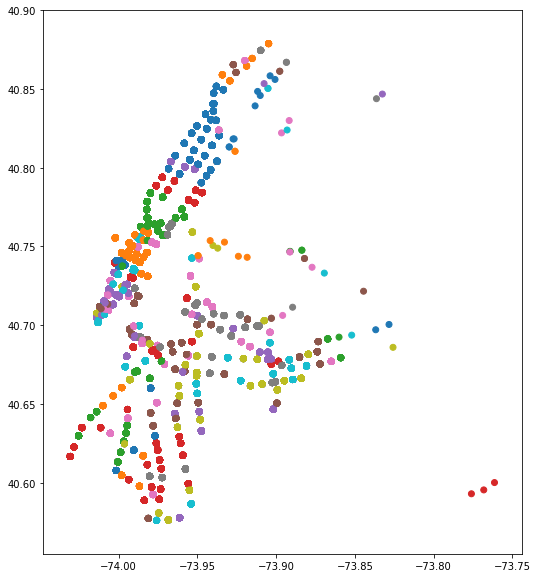

In [42]:
dist_gdf.plot(figsize=(15,10),column='station');

In [43]:
pd.set_option('display.max_columns',50)

In [44]:
gdf.head()

address apartment_number  borough building_class_category  \
0      70 BAY 10 STREET                0        3    01  ONE FAMILY HOMES   
1  8650 BAY 16TH STREET                0        3    01  ONE FAMILY HOMES   
2  8650 BAY 16TH STREET               2A        3  04  TAX CLASS 1 CONDOS   
3  8650 BAY 16TH STREET               1B        3  04  TAX CLASS 1 CONDOS   
4  8650 BAY 16TH STREET               1C        3  04  TAX CLASS 1 CONDOS   

   commercial_units  gross_square_feet  land_square_feet neighborhood  \
0                 0               1428              2513   BATH BEACH   
1                 0               1724              4833   BATH BEACH   
2                 0                  0                 0   BATH BEACH   
3                 0                  0                 0   BATH BEACH   
4                 0                  0                 0   BATH BEACH   

   residential_units   sale_date  sale_price  total_units  year_built  \
0                  1  2012-06-28      610000            1        1930   
1                  1  2012-12-18      860000            1        1930   
2                  1  2012-07-25      452000            1           0   
3                  1  2014-10-27      510000            1           0   
4                  1  2015-12-15      520000            1           0   

   zip_code                              geometry  
0     11228          POINT (-74.010374 40.609752)  
1     11214  POINT (-74.00533840000001 40.607264)  
2     11214  POINT (-74.00533840000001 40.607264)  
3     11214  POINT (-74.00533840000001 40.607264)  
4     11214  POINT (-74.00533840000001 40.607264)

In [46]:
dist_gdf.head()

address num_within_dist   station line  \
0  8650 BAY 16TH STREET               3   79th St    D   
1  8650 BAY 16TH STREET               3  20th Ave    D   
2  8650 BAY 16TH STREET               3  18th Ave    D   
3    70 BAY 20TH STREET               2  20th Ave    D   
4    70 BAY 20TH STREET               2  18th Ave    D   

                                geometry   stat_lng   stat_lat    add_lng  \
0  POINT (-74.0005828 40.61315889999999) -74.000583  40.613159 -74.005338   
1  POINT (-73.9981743 40.60467689999999) -73.998174  40.604677 -74.005338   
2         POINT (-74.0015925 40.6077357) -74.001593  40.607736 -74.005338   
3  POINT (-73.9981743 40.60467689999999) -73.998174  40.604677 -74.002813   
4         POINT (-74.0015925 40.6077357) -74.001593  40.607736 -74.002813   

     add_lat  dist_miles  
0  40.607264    0.477642  
1  40.607264    0.416171  
2  40.607264    0.199187  
3  40.605148    0.245514  
4  40.605148    0.189921

In [47]:
len(dist_gdf)

39260

In [48]:
line_count = list(dist_gdf.line)

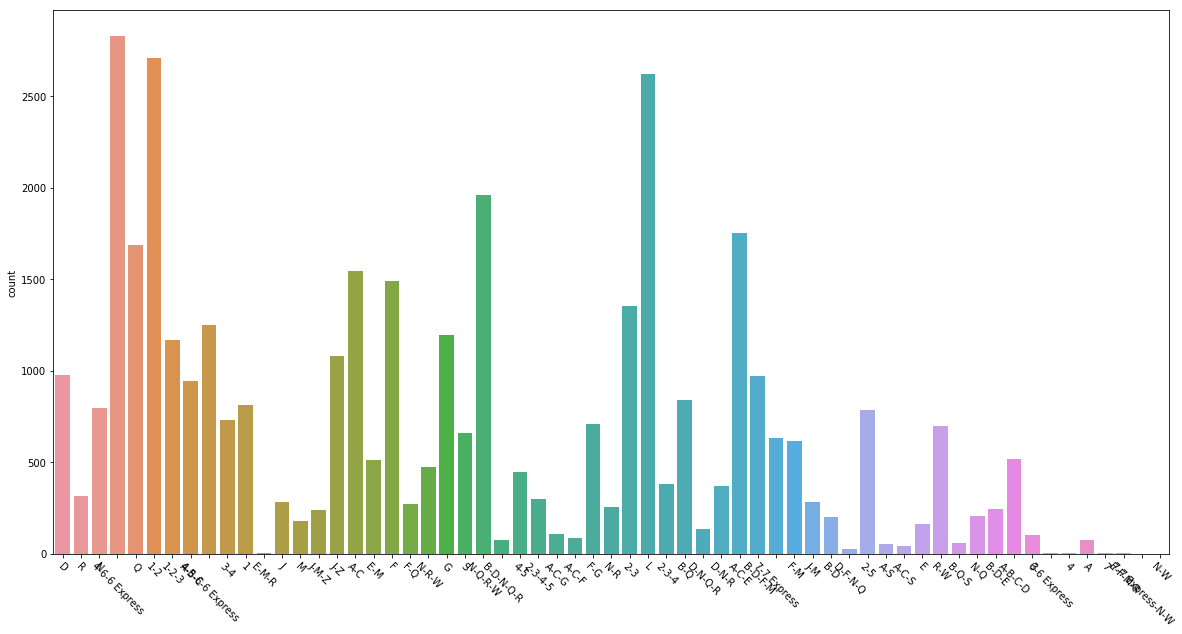

In [56]:
plt.figure(figsize=(20,10))
sns.countplot(line_count)
plt.xticks(rotation=-45);

In [52]:
import seaborn as sns

In [57]:
dist_df.to_csv('data/nearest_subways_df.csv')

## Apartments plotted on NYC neighborhood map

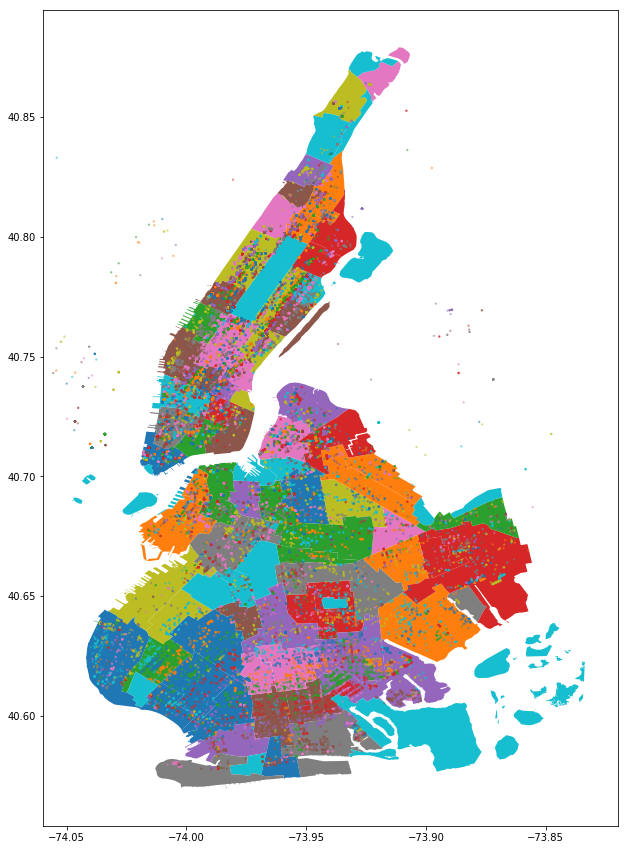

In [92]:
ax = df.plot(column='ntaname',figsize=(20,15))
gdf[gdf.distance(test)<.15].plot(column=gdf[gdf.distance(test)<.15].address,ax=ax,markersize=2,alpha=.4)
plt.xlim(-74.06,-73.82);

## Subway stations plotted on NYC neighborhood map, colored by line

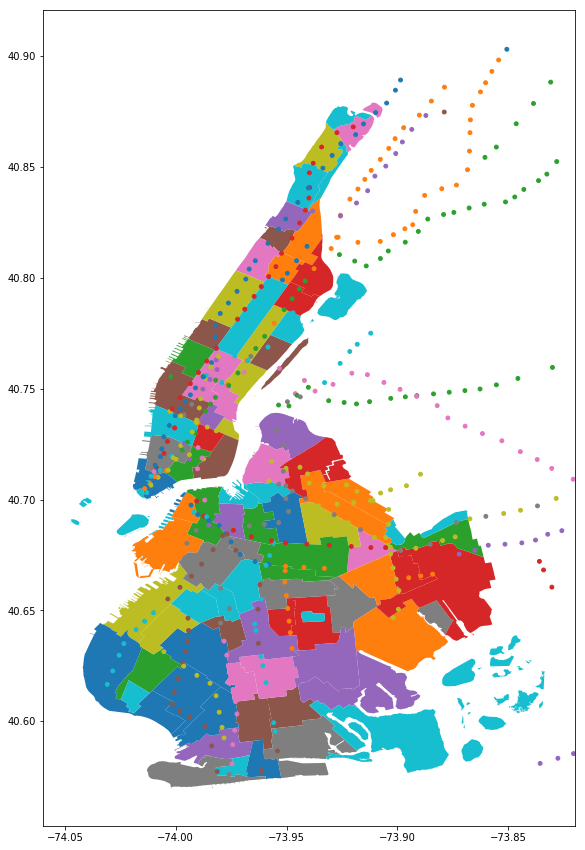

In [100]:
ax = df.plot(column='ntaname',figsize=(20,15))
subway_gdf.plot(column=subway_gdf.LINE,ax=ax,markersize=15)

plt.xlim(-74.06,-73.82);

# Plotting with Bokeh

In [116]:
from bokeh.plotting import figure, save
from bokeh.models import ColumnDataSource, HoverTool, LogColorMapper 

In [127]:
bok_test = dist_gdf.copy()

In [128]:
bok_test = bok_test.drop(columns=['geometry'])

In [129]:
bok_test.head()

address num_within_dist   station line   stat_lng   stat_lat  \
0  8650 BAY 16TH STREET               3   79th St    D -74.000583  40.613159   
1  8650 BAY 16TH STREET               3  20th Ave    D -73.998174  40.604677   
2  8650 BAY 16TH STREET               3  18th Ave    D -74.001593  40.607736   
3    70 BAY 20TH STREET               2  20th Ave    D -73.998174  40.604677   
4    70 BAY 20TH STREET               2  18th Ave    D -74.001593  40.607736   

     add_lng    add_lat  dist_miles  
0 -74.005338  40.607264    0.477642  
1 -74.005338  40.607264    0.416171  
2 -74.005338  40.607264    0.199187  
3 -74.002813  40.605148    0.245514  
4 -74.002813  40.605148    0.189921

In [130]:
psource = ColumnDataSource(bok_test)

In [131]:
p = figure(title="A map of address points from a Shapefile")
p.circle('add_lat', 'add_lng', source=psource, color='red', size=10)

bokeh.models.renderers.GlyphRenderer(
    id='ee8029f8-b25a-4f8b-86a7-4c962dbe4500',
    data_source=bokeh.models.sources.ColumnDataSource(
        id='5e9f8d3e-71d8-4f67-8c17-ace0873d3fcc',
        callback=None,
        data={'line': ['D',
          'D',
          'D',
          'D',
          'D',
          'D',
          'D',
          'D',
          'D',
          'D',
          'D',
          'D',
          'D',
          'D',
          'D',
          'D',
          'D',
          'D',
          'D',
          'D',
          'D',
          'D',
          'D',
          'D',
          'D',
          'D',
          'D',
          'D',
          'D',
          'D',
          'D',
          'D',
          'D',
          'D',
          'D',
          'D',
          'D',
          'D',
          'D',
          'D',
          'R',
          'N',
          'R',
          'R',
          'N',
          'N',
          '4-6-6 Express',
          '4-6-6 Express',
          'Q',
          'R',
          'R',
          '1-2',
          '1-2-3',
          '1-2',
          '4-6-6 Express',
          '4-6-6 Express',
          'Q',
          'R',
          'R',
          '4-6-6 Express',
          'Q',
          '1-2-3',
          'A-B-C',
          '1-2',
          '1-2',
          '1-2-3',
          'A-B-C',
          '1-2',
          'R',
          'R',
          'R',
          'R',
          'R',
          'R',
          'R',
          '1-2',
          '1-2-3',
          'A-B-C',
          '1-2',
          '4-6-6 Express',
          '4-5-6-6 Express',
          'Q',
          'Q',
          '1-2',
          '1-2-3',
          'A-B-C',
          'A-B-C',
          '1-2',
          '1-2',
          '1-2-3',
          'A-B-C',
          '1-2',
          '4-6-6 Express',
          '4-5-6-6 Express',
          'Q',
          'Q',
          'R',
          'R',
          'R',
          '4-6-6 Express',
          '4-5-6-6 Express',
          'Q',
          'Q',
          'R',
          'R',
          '4-6-6 Express',
          '4-5-6-6 Express',
          'Q',
          'R',
          'R',
          '4-6-6 Express',
          '4-5-6-6 Express',
          'Q',
          'Q',
          'R',
          'R',
          'R',
          'R',
          'R',
          'R',
          'R',
          '3-4',
          'R',
          'R',
          'R',
          'R',
          'R',
          'A-B-C',
          '1-2-3',
          '1',
          'A-B-C',
          'R',
          'R',
          'R',
          'R',
          'R',
          'R',
          'R',
          'R',
          '1-2',
          '1-2-3',
          'R',
          'R',
          'R',
          'R',
          '4-6-6 Express',
          'Q',
          'Q',
          'R',
          'R',
          'R',
          'R',
          'R',
          'E-M-R',
          'E-M-R',
          'A-B-C',
          '1-2-3',
          '1',
          'A-B-C',
          'A-B-C',
          'R',
          'R',
          'R',
          'R',
          'R',
          'R',
          'R',
          'R',
          'R',
          'R',
          'R',
          'R',
          'R',
          'R',
          'J',
          'M',
          'J-M-Z',
          'J',
          'M',
          'J-M-Z',
          'J',
          'J-Z',
          'M',
          'J',
          'J-Z',
          'M',
          'J-M-Z',
          'J',
          'J-Z',
          'A-C',
          'J',
          '4-5-6-6 Express',
          '4-6-6 Express',
          'E-M',
          'E-M',
          'F',
          'F-Q',
          'N-R-W',
          'N-R-W',
          'A-C',
          'J',
          'J',
          'J-Z',
          'J',
          'J-Z',
          'A-C',
          'A-C',
          'A-C',
          'A-C',
          'J-Z',
          'A-C',
          'A-C',
          'G',
          'G',
          'G',
          'G',
          'G',
          'A-C',
          'G',
          'G',
          'A-C',
          'G',
          'A-C',
          'G',
          '

In [132]:
my_hover = HoverTool()
my_hover.tooltips = [('Address of the point', '@address')]
p.add_tools(my_hover)

In [136]:
bokeh_nb = df.copy()
bokeh_nb=bokeh_nb.reset_index(drop=True)
bokeh_nb.head()

ntacode                  ntaname  boro_name  boro_code  \
0    BK88             Borough Park   Brooklyn          3   
1    MN06           Manhattanville  Manhattan          1   
2    BK25                Homecrest   Brooklyn          3   
3    MN19  Turtle Bay-East Midtown  Manhattan          1   
4    BK44                  Madison   Brooklyn          3   

                                            geometry  
0  (POLYGON ((-73.97604935657381 40.6312759056467...  
1  (POLYGON ((-73.94607828674226 40.8212632160619...  
2  (POLYGON ((-73.95859278495766 40.6104030309350...  
3  (POLYGON ((-73.96124698011518 40.7404235971153...  
4  (POLYGON ((-73.93753749374089 40.6085573897549...

In [138]:
def getPolyCoords(row, geom, coord_type):
    """Returns the coordinates ('x' or 'y') of edges of a Polygon exterior"""

    # Parse the exterior of the coordinate
    exterior = row[geom].exterior

    if coord_type == 'x':
        # Get the x coordinates of the exterior
        return list( exterior.coords.xy[0] )
    elif coord_type == 'y':
        # Get the y coordinates of the exterior
        return list( exterior.coords.xy[1] )

In [139]:
bokeh_nb['x'] = bokeh_nb.apply(getPolyCoords, geom='geometry', coord_type='x', axis=1)
bokeh_nb['y'] = bokeh_nb.apply(getPolyCoords, geom='geometry', coord_type='y', axis=1)

AttributeError: ("'MultiPolygon' object has no attribute 'exterior'", 'occurred at index 0')

In [133]:
outfp = r"../point_map.html"
save(p, outfp)

/Users/SamLiebman/anaconda3/lib/python3.6/site-packages/bokeh/io/saving.py:123: UserWarning: save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN
  warn("save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN")
/Users/SamLiebman/anaconda3/lib/python3.6/site-packages/bokeh/io/saving.py:136: UserWarning: save() called but no title was supplied and output_file(...) was never called, using default title 'Bokeh Plot'
  warn("save() called but no title was supplied and output_file(...) was never called, using default title 'Bokeh Plot'")


'/Users/SamLiebman/flatiron/real-estate-project/point_map.html'